In [1]:
import xarray as xa
import pandas as pd
import numpy as np
import cmocean

In [2]:
#wrap the plot in image settings for visual appeal
# may be able to make this cleaner or just a preset
%run '../../../settings/mpl_plot_settings.py'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


In [32]:
ncfiles = '/Users/bell/ecoraid/2023/Moorings/23bs2a/final_data_cf/*eco*.nc'
ncfiles_2 = '/Users/bell/ecoraid/2023/Moorings/23bspr2a/final_data_cf/*eco*.nc'
mfd = xa.open_mfdataset(ncfiles, chunks=None)
mfd_2 = xa.open_mfdataset(ncfiles_2, chunks=None)

mfd = (mfd.interpolate_na("time")).resample({'time':'1H'}).mean()
mfd_2 = (mfd_2.interpolate_na("time")).resample({'time':'1H'}).mean()

(-1.0, 20.0)

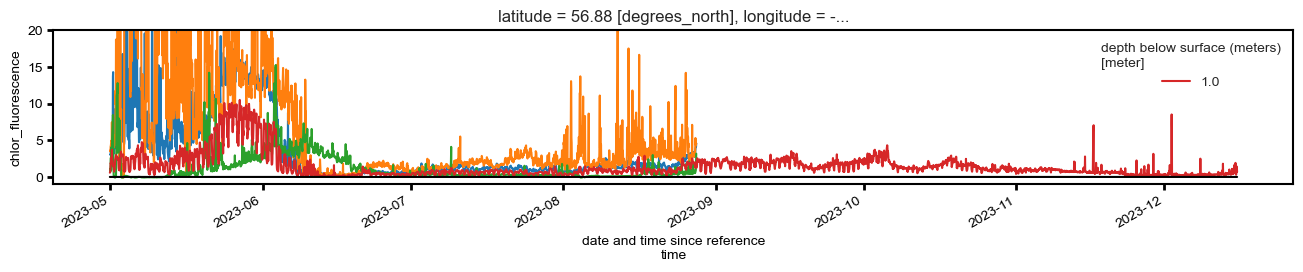

In [34]:
fig, ax = plt.subplots(1,figsize=(16, 2))
mfd.chlor_fluorescence.dropna(how='all',dim='depth').plot(x="time",hue="depth",ax=ax);
mfd_2.chlor_fluorescence.dropna(how='all',dim='depth').plot(x="time",hue="depth",ax=ax);
(mfd_2.isel({'depth':0}).chlor_fluorescence*0).plot(ax=ax,c='k',add_legend=False); #zeroline
ax.set_ylim([-1,20])

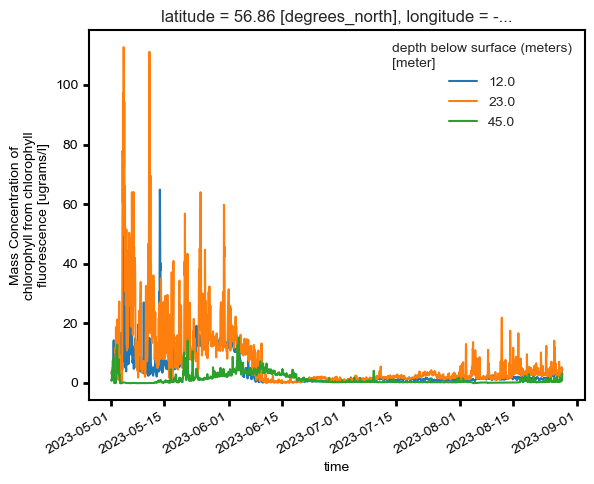

In [33]:
mfd.chlor_fluorescence.dropna(how='all',dim='depth').plot(x="time",hue="depth");


In [35]:
mfd

<xarray.Dataset>
Dimensions:             (latitude: 1, longitude: 1, depth: 3, time: 2857)
Coordinates:
  * latitude            (latitude) float64 56.86
  * longitude           (longitude) float64 -164.1
  * depth               (depth) float64 12.0 23.0 45.0
  * time                (time) datetime64[ns] 2023-05-01 ... 2023-08-28
Data variables:
    chlor_fluorescence  (time, depth, latitude, longitude) float64 dask.array<chunksize=(1, 1, 1, 1), meta=np.ndarray>
Attributes: (12/15)
    Latitude_DegMMddW:                      56 51.786 N
    Longitude_DegMMddN:                     164 3.034 W
    MooringID:                              23BS-2A
    platform_deployment_date:               2023-05-01T01:00:00Z
    platform_deployment_cruise_name:        DY2306
    platform_recovery_date:                 2023-08-28T00:00:00Z
    ...                                     ...
    InstrumentSerialNumber:                 1837
    InstrumentType:                         Eco-Fluorometer FLSB
    date_created:                           2023-11-01T11:05:25Z
    date_modified:                          2023-11-01 12:23:40.603672
    QC_indicator:                           ProbablyGood
    history:                                Trimmed to deployment.\nTrimmed t...